In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: /content/drive/MyDrive/COMP1816_Titanic_Dataset_Classification.csv this is my file read the csv file with pytthon

import pandas as pd
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/COMP1816_Titanic_Dataset_Classification.csv')

# Display the first few rows of the dataframe
print(df.head())


   PassengerId  Pclass                                          Name     Sex  \
0            1     3.0                       Braund, Mr. Owen Harris    male   
1            2     1.0                                           NaN  female   
2            3     3.0                        Heikkinen, Miss. Laina  female   
3            4     1.0  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4            5     3.0                      Allen, Mr. William Henry    male   

    Age  SibSp  Parch        Ticket No.     Fare Embarked  Survival  
0  22.0    1.0    0.0         A/5 21171   7.2500        S       0.0  
1  38.0    1.0    0.0          PC 17599  71.2833        C       1.0  
2  26.0    0.0    0.0  STON/O2. 3101282   7.9250        S       1.0  
3  35.0    1.0    0.0            113803  53.1000        S       1.0  
4  35.0    0.0    0.0            373450   8.0500        S       0.0  


<Axes: xlabel='Survival', ylabel='count'>

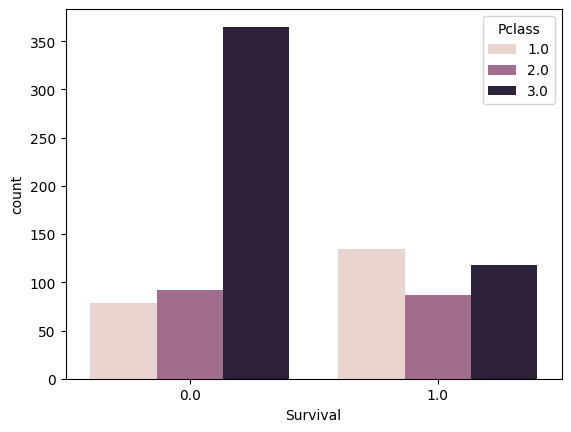

In [ ]:
sns.countplot(x='Survival', data= df, hue ='Pclass')

so here it is clear that majority of the people did not survived from the ticketclass 3

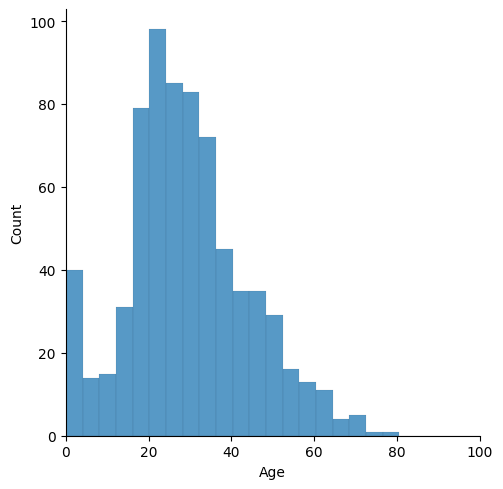

In [ ]:
sns.displot(df['Age'], kde=False)
plt.xlim(0, 100)  # Set the x-axis limits
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       880 non-null    float64
 2   Name         885 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          715 non-null    float64
 5   SibSp        888 non-null    float64
 6   Parch        888 non-null    float64
 7   Ticket No.   888 non-null    object 
 8   Fare         888 non-null    float64
 9   Embarked     884 non-null    object 
 10  Survival     886 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 76.6+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Pclass,10
Name,5
Sex,0
Age,175
SibSp,2
Parch,2
Ticket No.,2
Fare,2
Embarked,6


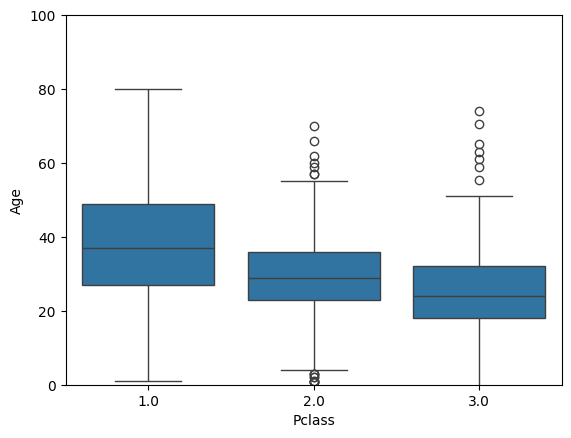

In [ ]:


sns.boxplot(x='Pclass', y='Age', data=df)
plt.ylim(0, 100)  # Set the y-axis limits to 0-100
plt.show()

In [ ]:


# Calculate the mean age for each passenger class
mean_age_by_pclass = df.groupby('Pclass')['Age'].mean()

mean_age_by_pclass


,Age
Pclass,
1.0,38.149022
2.0,29.793118
3.0,33.489801


In [ ]:
print(df[df['Pclass']==1]['Age'].mean())
print(df[df['Pclass']==2]['Age'].mean())
print(df[df['Pclass']==3]['Age'].mean())

38.14902173913043
29.793117647058825
33.48980056980057


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
def fill_in_na_values(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return round(df[df['Pclass']==1]['Age'].mean())
    elif pclass == 2:
      return round(df[df['Pclass']==2]['Age'].mean())
    else:
      return round(df[df['Pclass']==3]['Age'].mean())
  else:
                   return age
df['Age']=df[['Age', 'Pclass']].apply(fill_in_na_values, axis=1)



<ipython-input-24-fe67a078db9b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
<ipython-input-24-fe67a078db9b>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


In [ ]:
# Fill missing Pclass values (if any)
df['Pclass'].fillna(df['Pclass'].mode()[0], inplace=True)

# Function to fill missing Age values
def fill_in_na_values(cols, df):
    age, pclass = cols
    if pd.isnull(age):
        return round(df[df['Pclass'] == pclass]['Age'].mean())
    return age

# Apply function to fill missing Age values
df['Age'] = df[['Age', 'Pclass']].apply(lambda row: fill_in_na_values(row, df), axis=1)

print(df)

     PassengerId  Pclass                                          Name  \
0              1     3.0                       Braund, Mr. Owen Harris   
1              2     1.0                                           NaN   
2              3     3.0                        Heikkinen, Miss. Laina   
3              4     1.0  Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5     3.0                      Allen, Mr. William Henry   
..           ...     ...                                           ...   
885          886     2.0                         Montvila, Rev. Juozas   
886          887     1.0                  Graham, Miss. Margaret Edith   
887          888     3.0      Johnston, Miss. Catherine Helen "Carrie"   
888          889     1.0                         Behr, Mr. Karl Howell   
889          890     3.0                           Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        Ticket No.     Fare Embarked  Survival  
0      male  22.0    1.0    0.0

<ipython-input-25-8fcf2ce5818d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pclass'].fillna(df['Pclass'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,5
Sex,0
Age,0
SibSp,2
Parch,2
Ticket No.,2
Fare,2
Embarked,6


In [ ]:
def fill_in_na_values(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return round(df[df['Pclass']==1]['Age'].mean())
    elif pclass == 2:
      return round(df[df['Pclass']==2]['Age'].mean())
    elif pclass == 3:
      return round(df[df['Pclass']==3]['Age'].mean())
  else:
      return age
df['Age']=df[['Age', 'Pclass']].apply(fill_in_na_values, axis=1)

<ipython-input-27-d9409739061d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
<ipython-input-27-d9409739061d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,5
Sex,0
Age,0
SibSp,2
Parch,2
Ticket No.,2
Fare,2
Embarked,6


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket No.,0
Fare,0
Embarked,0


In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket No.,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1.0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,1.0
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,0.0
6,7,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,S,0.0


In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket No.'], axis=1, inplace=True)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival
0,3.0,male,22.0,1.0,0.0,7.2500,S,0.0
2,3.0,female,26.0,0.0,0.0,7.9250,S,1.0
3,1.0,female,35.0,1.0,0.0,53.1000,S,1.0
4,3.0,male,35.0,0.0,0.0,8.0500,S,0.0
6,1.0,male,54.0,0.0,0.0,51.8625,S,0.0


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
sex = pd.get_dummies(df['Sex'], drop_first=True).astype(int)
embarked = pd.get_dummies(df['Embarked'], drop_first=True).astype(int)

In [ ]:
print(sex)
print(embarked)

     male
0       1
2       0
3       0
4       1
6       1
..    ...
885     1
886     0
887     0
888     1
889     1

[878 rows x 1 columns]
     Q  S
0    0  1
2    0  1
3    0  1
4    0  1
6    0  1
..  .. ..
885  0  1
886  0  1
887  0  1
888  0  0
889  1  0

[878 rows x 2 columns]


In [ ]:
df = pd.concat([df, sex, embarked], axis=1)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,male,Q,S,male,Q,S
0,3.0,male,22.0,1.0,0.0,7.2500,S,0.0,True,False,True,1,0,1
2,3.0,female,26.0,0.0,0.0,7.9250,S,1.0,False,False,True,0,0,1
3,1.0,female,35.0,1.0,0.0,53.1000,S,1.0,False,False,True,0,0,1
4,3.0,male,35.0,0.0,0.0,8.0500,S,0.0,True,False,True,1,0,1
6,1.0,male,54.0,0.0,0.0,51.8625,S,0.0,True,False,True,1,0,1


In [ ]:
# Drop the first occurrences of 'male', 'Q', 'S' but keep the last three
df = df.drop(df.columns[list(df.columns).index('male'):list(df.columns).index('male')+3], axis=1)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival
0,3.0,male,22.0,1.0,0.0,7.2500,S,0.0
2,3.0,female,26.0,0.0,0.0,7.9250,S,1.0
3,1.0,female,35.0,1.0,0.0,53.1000,S,1.0
4,3.0,male,35.0,0.0,0.0,8.0500,S,0.0
6,1.0,male,54.0,0.0,0.0,51.8625,S,0.0


In [ ]:
sex = pd.get_dummies(df['Sex'], drop_first=True).astype(int)
embarked = pd.get_dummies(df['Embarked'], drop_first=True).astype(int)

In [ ]:
df = pd.concat([df, sex, embarked], axis=1)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,male,Q,S
0,3.0,male,22.0,1.0,0.0,7.2500,S,0.0,1,0,1
2,3.0,female,26.0,0.0,0.0,7.9250,S,1.0,0,0,1
3,1.0,female,35.0,1.0,0.0,53.1000,S,1.0,0,0,1
4,3.0,male,35.0,0.0,0.0,8.0500,S,0.0,1,0,1
6,1.0,male,54.0,0.0,0.0,51.8625,S,0.0,1,0,1


In [ ]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survival,male,Q,S
0,3.0,22.0,1.0,0.0,7.2500,0.0,1,0,1
2,3.0,26.0,0.0,0.0,7.9250,1.0,0,0,1
3,1.0,35.0,1.0,0.0,53.1000,1.0,0,0,1
4,3.0,35.0,0.0,0.0,8.0500,0.0,1,0,1
6,1.0,54.0,0.0,0.0,51.8625,0.0,1,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

x = df.drop('Survival', axis=1)
y = df['Survival']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('Survival', axis=1)
y = df['Survival']

# Split the last 140 rows as test set, and the rest as training set
X_train, X_test = X.iloc[:-140], X.iloc[-140:]  # Last 140 rows for testing
y_train, y_test = y.iloc[:-140], y.iloc[-140:]

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use same scaler for test data



In [ ]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        90
         1.0       0.88      0.58      0.70        50

    accuracy                           0.82       140
   macro avg       0.84      0.77      0.79       140
weighted avg       0.83      0.82      0.81       140

[[86  4]
 [21 29]]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.5, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.5, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

In [ ]:
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88        90
         1.0       0.91      0.58      0.71        50

    accuracy                           0.83       140
   macro avg       0.86      0.77      0.79       140
weighted avg       0.84      0.83      0.82       140

[[87  3]
 [21 29]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)
lm_prediction = lm.predict(X_test)

print(classification_report(y_test, lm_prediction))
print(confusion_matrix(y_test, lm_prediction))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        90
         1.0       0.77      0.68      0.72        50

    accuracy                           0.81       140
   macro avg       0.80      0.78      0.79       140
weighted avg       0.81      0.81      0.81       140

[[80 10]
 [16 34]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_prediction))
print(confusion_matrix(y_test, knn_prediction))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        90
         1.0       0.76      0.68      0.72        50

    accuracy                           0.81       140
   macro avg       0.79      0.78      0.78       140
weighted avg       0.80      0.81      0.80       140

[[79 11]
 [16 34]]


In [ ]:
import numpy as np

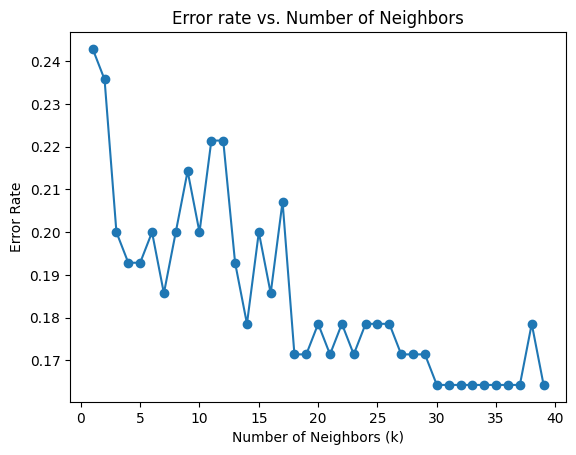

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

error_list = []

# Loop over different values of k (from 1 to 39)
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)

    # Append the error rate for the current k (n_neighbors=i)
    error_list.append(np.mean(prediction_i != y_test))

# Optionally, you could plot or analyze the error_list to see the optimal kprint(error_list)
import matplotlib.pyplot as plt

# Plotting the error rate vs. number of neighbors
plt.plot(range(1, 40), error_list, marker='o')
plt.title('Error rate vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
np.argmin(error_list)

29

In [ ]:
error_list[6]

0.18571428571428572

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
print(classification_report(y_test, knn_prediction))
print(confusion_matrix(y_test, knn_prediction))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        90
         1.0       0.76      0.68      0.72        50

    accuracy                           0.81       140
   macro avg       0.79      0.78      0.78       140
weighted avg       0.80      0.81      0.80       140

[[79 11]
 [16 34]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_prediction = dtree.predict(X_test)
print(classification_report(y_test, dtree_prediction))
print(confusion_matrix(y_test, dtree_prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88        90
         1.0       0.77      0.82      0.80        50

    accuracy                           0.85       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.85      0.85      0.85       140

[[78 12]
 [ 9 41]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        90
         1.0       0.82      0.82      0.82        50

    accuracy                           0.87       140
   macro avg       0.86      0.86      0.86       140
weighted avg       0.87      0.87      0.87       140

